In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../data")
sys.path.append("../utils")
import compute_energy

# Implementation of Force and Neighbour Computations (14/10/2025)

## Objectives
The aim of this exercise was to implement and test core routines used in atomistic simulations for the computation of interatomic forces, neighbour lists, and potential energy.

## Tasks Overview

### 1. Force Computation
- Implemented a function `force_matrix(filename, rc)` that returns a matrix containing the total force acting on each atom along the **x**, **y**, and **z** directions.  
- Each row corresponds to one atom, with columns representing `(Fx, Fy, Fz)`.  
- The function supports both full interaction calculations (no cutoff) and distance-limited calculations using a cutoff radius `rc`.

### 2. Neighbour Count
- Developed a function `nbrs(filename, rc)` that computes the number of neighbouring atoms within a given cutoff distance `rc`.  
- Returns a list where each element represents the number of neighbours of atom *i*.

### 3. Neighbour Index List
- Implemented a function `which_nbrs(filename, rc)` that returns, for each atom *i*, a list of the **indices of neighbouring atoms** within the cutoff radius.  
- This function was later used to optimize force and energy calculations.

### 4. Force and Energy Using Neighbour Lists
- Recomputed the total forces and potential energy using the neighbour lists obtained from `which_nbrs`.  
- Verified that these results are consistent with those obtained through direct pairwise computations using the cutoff radius.

### 5. Scaling of Neighbours with System Size
- Analysed how the average number of neighbours changes with increasing system size.  
- Used multiple datasets (e.g., `fcc100a108.txt`, `fcc100a256.txt`, `fcc100a500.txt`, etc.) to study the dependence on the number of atoms.  
- Observed the expected increase in average neighbour count.

In [2]:
# force matrix
F_matrix = compute_energy.force_matrix("fcc100a500.txt", 3)
F_matrix = np.array(F_matrix, dtype=float)

# neighbours
nbrs = compute_energy.which_nbrs("fcc100a500.txt", 3)

for i, (Fx, Fy, Fz) in enumerate(F_matrix[:10]):
    num_nbrs = len(nbrs[i])
    indices = tuple(nbrs[i])
    print(f"{i}   Fx={Fx:.4f}    Fy={Fy:.4f}     Fz={Fz:.4f}          number of neighbours={num_nbrs}        indices of neighbours={indices}")


0   Fx=0.0000    Fy=0.0000     Fz=-0.2269          number of neighbours=8        indices of neighbours=(1, 2, 10, 12, 64, 65, 89, 96)
1   Fx=-0.1135    Fy=-0.1135     Fz=-0.1135          number of neighbours=3        indices of neighbours=(0, 64, 65)
2   Fx=-0.1702    Fy=-0.0000     Fz=-0.1702          number of neighbours=5        indices of neighbours=(0, 3, 64, 96, 97)
3   Fx=0.0000    Fy=0.0000     Fz=-0.2269          number of neighbours=8        indices of neighbours=(2, 4, 12, 14, 53, 80, 96, 97)
4   Fx=-0.1702    Fy=-0.0000     Fz=-0.1702          number of neighbours=5        indices of neighbours=(3, 5, 80, 81, 97)
5   Fx=0.0000    Fy=0.0000     Fz=-0.2269          number of neighbours=8        indices of neighbours=(4, 6, 14, 16, 56, 61, 80, 81)
6   Fx=-0.1702    Fy=0.0000     Fz=-0.1702          number of neighbours=5        indices of neighbours=(5, 7, 56, 57, 81)
7   Fx=0.0000    Fy=-0.0000     Fz=-0.2269          number of neighbours=8        indices of neighbours=(6, 8,

In [5]:
# comparing the two ways of computing forces and potential energy (with and without nbrs)
F_matrix_nbrs = compute_energy.force_matrix_nbrs("fcc100a500.txt", 3)
F_matrix_nbrs = np.array(F_matrix_nbrs, dtype=float)

energy = compute_energy.energy("fcc100a500.txt", 3)
energy_nbrs = compute_energy.energy_nbrs("fcc100a500.txt", 3)

delta_E = energy - energy_nbrs
delta_F = F_matrix - F_matrix_nbrs

for i in range (10) :
    dFx, dFy, dFz = delta_F[i]
    print(f"{i} dFx={dFx:.10f}  dFy={dFy:.10f}  dFz={dFz:.10f}  dE={delta_E:.20f}")

0 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
1 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
2 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
3 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
4 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
5 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
6 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
7 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
8 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000
9 dFx=0.0000000000  dFy=0.0000000000  dFz=0.0000000000  dE=0.00000000000000000000


In [39]:
# compute the number of neighbours for different files and see how it scales with the dimension
data = ["fcc100a108.txt", "fcc100a256.txt", "fcc100a500.txt", "fcc100a864.txt", "fcc100a1372.txt", "fcc100a2048.txt"]
N = []
nbrs_avg = []

for file in data :
    coord = np.loadtxt("../data/"+file)
    N.append(coord.shape[0])
    nbrs = compute_energy.nbrs(file, 3)
    avg = np.mean(nbrs)
    nbrs_avg.append(avg)
    print(f"{file:20s}  average neighbours = {avg:.2f}")

fcc100a108.txt        average neighbours = 8.33
fcc100a256.txt        average neighbours = 9.19
fcc100a500.txt        average neighbours = 9.72
fcc100a864.txt        average neighbours = 10.08
fcc100a1372.txt       average neighbours = 10.35
fcc100a2048.txt       average neighbours = 10.55


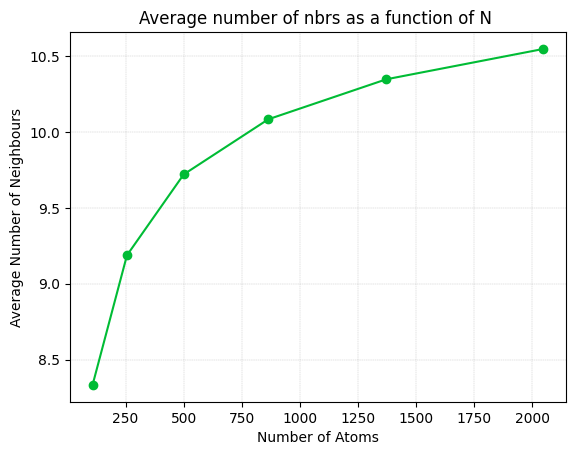

In [27]:
plt.plot(N, nbrs_avg, 'o-', color="#00bc35", label="number of neighbours vs number of atoms")
plt.xlabel("Number of Atoms")
plt.ylabel("Average Number of Neighbours")
plt.title("Average number of nbrs as a function of N ")
plt.grid(True, color='gray', linestyle='--', linewidth=0.3, alpha=0.5)
plt.show()